# Decisio

In [2]:
# Import libaries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.model_selection import train_test_split

In [3]:
# load dataset
df = sns.load_dataset('titanic')

In [4]:
# impute by imputer
imputer = SimpleImputer(strategy='median')
df[['age','fare']] = imputer.fit_transform(df[['age','fare']])
# impute missing values
imputer_2 = SimpleImputer(strategy='most_frequent')
df[['embark_town','embarked']] = imputer_2.fit_transform(df[['embark_town', 'embarked']])

In [5]:
# # pre_process data
# # remove deck column
# # df.drop('deck', inplace=True, axis = 1)
# # impute the missing values
# df['age'] = df['age'].fillna(df['age'].median())
# df['fare'] = df['fare'].fillna(df['fare'].median())
# # sns.histplot(df['age'], kde=True)
# # impute missing values in embarked and embarked_town
# df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
# df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
# # Encode the categorical variabel
# le = LabelEncoder()
# for i in df.columns():
#     if df[i].dtype =='object' or df[i].dtype == 'category':
#         df[i]= le.fit_transform(df[i])
# new way of encoding
le = LabelEncoder()
for col in df.select_dtypes(include=['category','object']):
    df[col] = le.fit_transform(df[col])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,7,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,7,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,7,2,0,True


In [31]:
# Split data
X = df.drop(['survived','alive'], axis = 1)
y = df['survived']
# train test
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, train_size=0.8, random_state=42)

In [50]:
# call model
model = DecisionTreeClassifier(criterion='entropy', max_depth=4,random_state=42)
# call the model on X_train
model.fit(X_train, y_train)
# Predict Model
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1])

Accuracy: 0.83
Confusion Matrix:
[[88 17]
 [13 61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       105
           1       0.78      0.82      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179

Precision: 0.83


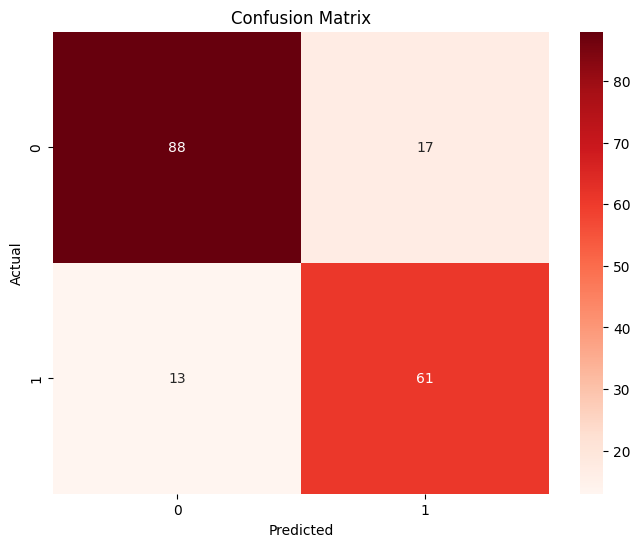

In [51]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'Precision: {precision:.2f}')
# ____
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

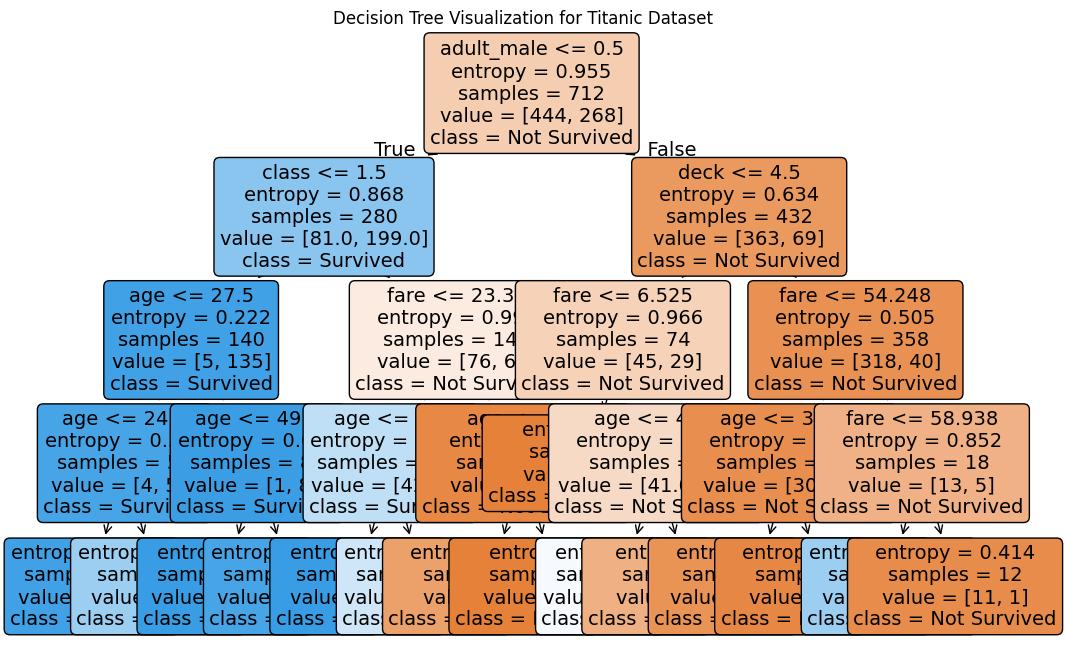

In [52]:
# Set up the plot
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True, fontsize=14)
plt.title("Decision Tree Visualization for Titanic Dataset")
plt.show()

In [53]:
# saving modeol
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='tree_3_entropy_max_dep.dot', feature_names=X.columns,filled=True, rounded=True)